<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/HW5_MAT422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 2.3 - MAT 422
Ivan Matyushov

Section 1 - Joint Probability Distributions

Discrete random vairables have whole integer number of possible events invovled. Pmfs can be used on discrete random variables by placing weights on each distinct variable.

Continuous random variables are continuous in that the events can take up floating point values. The probability can be found through a joint density function that integrates the function.

Independant random variables are denoted as events where the probability of one event does not affect the probability of another event.

[0.05, 0.25, 0.4, 0.25, 0.05]


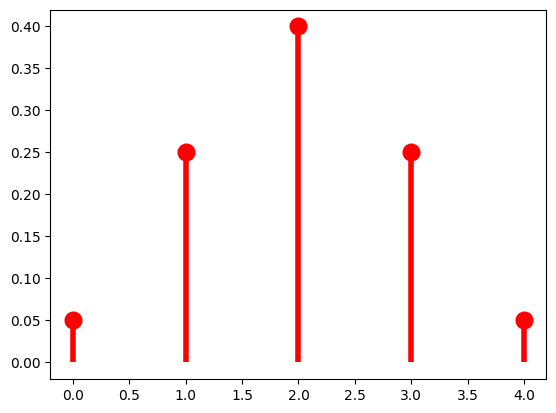

In [24]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#Section 2.3.1 - Joint probability distributions

x = np.arange(5)
P_x = [0.05, 0.25, 0.4, 0.25, 0.05] #Probability distribution of random events happening
print(P_x)

fig, ax = plt.subplots(1, 1) #Plots pmf of these events happening.
ax.plot(x, P_x, 'ro', ms=12, mec='r')
ax.vlines(x, 0, P_x, colors='r', lw=4)
plt.show()





Below we calculate the

In [5]:

marg_prob = [(0.10, 0.15, 0, 0.05),
             (0.20, 0.05, 0.05, 0.20),
             (0.05, 0, 0.10, 0.05)]
labels = ['0', '1', '2', '3']
labels_r = ['1', '2', '3']
prob_df = pd.DataFrame(marg_prob, index = labels_r, columns = labels)
print(prob_df)
marg_df = pd.DataFrame(prob_df.sum(axis = 1)) #Prints the marginal probabilities of above dataset
print(marg_df)

      0     1     2     3
1  0.10  0.15  0.00  0.05
2  0.20  0.05  0.05  0.20
3  0.05  0.00  0.10  0.05
     0
1  0.3
2  0.5
3  0.2


Looking at draws from 2 urns with twice as many red balls as blue balls in each urn. There are two independent draws (A & B) of the urns.
A joint probability distribution table can be made.

In [6]:
joint_prob = [(4/9, 2/9, 2/3),
              (2/9, 1/9, 1/3),
              (2/3, 1/3, 0)]
lbls = ['A=Red', 'A=Blue', 'P(A)']
idx = ['B=Red', 'B=Blue', 'P(B)']
joint_df = pd.DataFrame(joint_prob, index = idx, columns = lbls) #Makes dataframe of all probabilities available
print(joint_df)

           A=Red    A=Blue      P(A)
B=Red   0.444444  0.222222  0.666667
B=Blue  0.222222  0.111111  0.333333
P(B)    0.666667  0.333333  0.000000


In [27]:
salary_data = [(1.1, 21, 39343),
             (1.3, 21.5, 46205),
             (1.5, 21.7, 37731),
             (2, 22, 43525),
             (2.2, 22.2, 39891),
             (2.9, 23, 56642),
             (3.7, 23.6, 57189),
             (4, 24, 55749),
             (4.5, 38, 68019)
             (5.1, 26, 66029),
             (6.0, 29, 78435),
             (6.8, 30, 91378),
             (7.5, 33, 101283),
             (8.2, 32, 113812),
             (9.6, 36, 112635),
             (10.5, 42, 121325)]
labels1 = ['Years Experience', 'Age', 'Annual Salary']
salary_df = pd.DataFrame(salary_data, columns = labels1)
print(salary_df)
std_years = salary_df['Years Experience'].std() # Get std of years of experience
print(std_years)
std_sal = salary_df['Annual Salary'].std()
print(std_sal)
year_sal_cov = salary_df['Years Experience'].cov(salary_df['Annual Salary'])
print(year_sal_cov)
df_corr = (year_sal_cov)/(std_years*std_sal)
print(df_corr)

    Years Experience   Age  Annual Salary
0                1.1  21.0          39343
1                1.3  21.5          46205
2                1.5  21.7          37731
3                2.0  22.0          43525
4                2.2  22.2          39891
5                2.9  23.0          56642
6                3.7  23.6          57189
7                4.0  24.0          55749
8                4.5  38.0          68019
9                5.1  26.0          66029
10               6.0  29.0          78435
11               6.8  30.0          91378
12               7.5  33.0         101283
13               8.2  32.0         113812
14               9.6  36.0         112635
15              10.5  42.0         121325
3.020920113696046
28974.893000593347
85955.77041666668
0.982005580045138


Here, we're getting a correlation coefficient of 0.982 showing a strong positive correlation between years of work experience and ones annual salary. It makes sense for there to be a strong correlation with those 2 data sets.

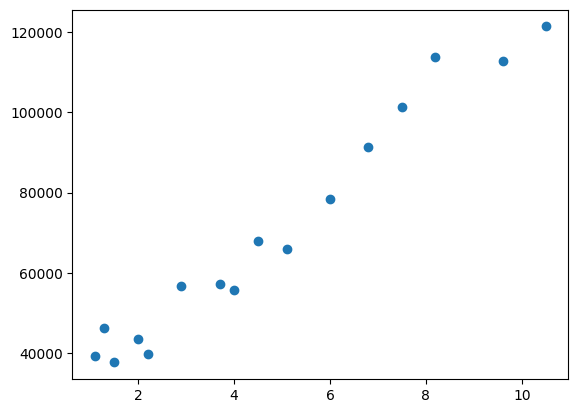

In [28]:
plt.scatter(salary_df['Years Experience'], salary_df['Annual Salary'], marker='o') #plot of data points comparing salary and years of experience.
plt.show()

Next, we can implement the central limit theorem to make this data's probability density skew towards a more normal distribution. It's not super accurate as the sample size is a bit small but with a sample size of 2, the density shifts to a more normal disitrbuiton slightly.

4.8062499999999995


Text(0, 0.5, 'Probability Density')

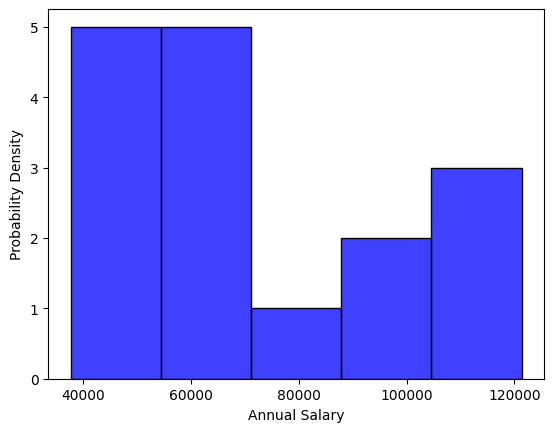

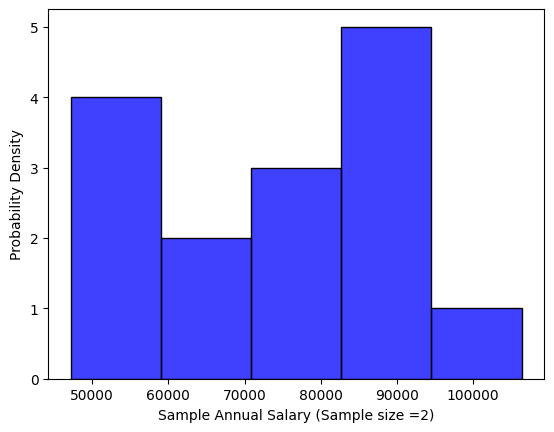

In [40]:
years_exp = salary_df['Years Experience']
ann_salary = salary_df['Annual Salary']
print(years_exp.mean())
fig = plt.figure()
sns.histplot(ann_salary, color='blue')
plt.xlabel('Annual Salary')
plt.ylabel('Probability Density')

mean = []
def calc_sample_mean(sample_size, no_of_sample_means):
    for i in range(no_of_sample_means):
        sample_base_salary = ann_salary.sample(n=sample_size)
        sample_mean=sample_base_salary.mean()
        mean.append(sample_mean)
    return mean

mean_2=calc_sample_mean(sample_size=2, no_of_sample_means=15)
fig1 = plt.figure()
sns.histplot(mean_2, color='b')
plt.xlabel('Sample Annual Salary (Sample size =2)')
plt.ylabel('Probability Density')